In [1]:
%load_ext watermark


In [2]:
from IPython.display import display
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp


In [3]:
%watermark -diwmuv -iv


Last updated: 2024-11-08T04:37:32.439852+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.5.0-1025-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

pandas : 2.2.3
teeplot: 1.1.3
seaborn: 0.13.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2024-11-07-scientific"
teeplot_subdir


'2024-11-07-scientific'

## Prep Data


In [5]:
df = pd.read_csv("https://osf.io/k8cd7/download")
display(df.describe()), display(df.head()), display(df.tail());


,true answer,llm answer,score,score - invalid as nan,job,replicate,num_taxa
count,38304.000000,33940.000000,38304.000000,33940.000000,38304.000000,38304.000000,38304.000000
mean,0.497076,0.630407,0.600956,0.678226,9.000000,1.500000,10.714286
std,0.698080,0.675662,0.489708,0.467164,5.477297,1.118049,7.591716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000,0.750000,4.000000
50%,0.000000,1.000000,1.000000,1.000000,9.000000,1.500000,8.000000
75%,1.000000,1.000000,1.000000,1.000000,14.000000,2.250000,18.000000
max,2.000000,2.000000,1.000000,1.000000,18.000000,3.000000,25.000000


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,job,replicate,question,num_taxa,tree representation,tree source,model
0,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-07T22:33:28.296797,0,0,question_equivalence_identical,3,newick,sample_phylogeny_newick,gpt-4o-mini
1,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-07T22:33:28.646976,0,0,question_equivalence_identical,3,json,sample_phylogeny_newick,gpt-4o-mini
2,Do the two given phylogenies represent the sam...,"yes, the phylogenies are equivalent|no, the ph...",1,0,1.0,0.0,0.0,2024-11-07T22:33:28.977170,0,0,question_equivalence_identical,3,none,sample_phylogeny_newick,gpt-4o-mini
3,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-07T22:33:29.354510,0,0,question_equivalence_identical,3,newick,scientific_phylogeny_newick,gpt-4o-mini
4,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-07T22:33:29.724350,0,0,question_equivalence_identical,3,json,scientific_phylogeny_newick,gpt-4o-mini


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,job,replicate,question,num_taxa,tree representation,tree source,model
38299,Consider the following phylogenetic tree:\n\n ...,T05|T18|neither,0,0,0.0,1.0,1.0,2024-11-07T22:49:15.753184,9,3,question_most_related_to_x,25,json,sample_phylogeny_newick,gpt-4o
38300,Which among T09 and T05 are most closely relat...,T09|T05|neither,2,0,2.0,0.0,0.0,2024-11-07T22:49:15.962929,9,3,question_most_related_to_x,25,none,sample_phylogeny_newick,gpt-4o
38301,Consider the following phylogenetic tree:\n\n ...,Helix pomatia|Aurelia aurita|neither,2,2,2.0,1.0,1.0,2024-11-07T22:49:16.330004,9,3,question_most_related_to_x,25,newick,scientific_phylogeny_newick,gpt-4o
38302,Consider the following phylogenetic tree:\n\n ...,Periplaneta americana|Anser anser|neither,1,1,1.0,1.0,1.0,2024-11-07T22:49:16.766330,9,3,question_most_related_to_x,25,json,scientific_phylogeny_newick,gpt-4o
38303,Which among Phelsuma andamanense and Rattus ra...,Phelsuma andamanense|Rattus rattus complex lin...,1,1,1.0,1.0,1.0,2024-11-07T22:49:17.117460,9,3,question_most_related_to_x,25,none,scientific_phylogeny_newick,gpt-4o


In [6]:
df["Q"] = df["question"].str.slice(9)


In [7]:
df["num choices"] = df["choices"].str.count(r"\|") + 1


In [8]:
df["adj score"] = df["score"] * df["num choices"]


In [9]:
df["tree repr"] = df["tree representation"]


In [10]:
display(df.describe()), display(df.head()), display(df.tail());


,true answer,llm answer,score,score - invalid as nan,job,replicate,num_taxa,num choices,adj score
count,38304.000000,33940.000000,38304.000000,33940.000000,38304.000000,38304.000000,38304.000000,38304.000000,38304.000000
mean,0.497076,0.630407,0.600956,0.678226,9.000000,1.500000,10.714286,2.333333,1.408521
std,0.698080,0.675662,0.489708,0.467164,5.477297,1.118049,7.591716,0.471411,1.205396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000,0.750000,4.000000,2.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,9.000000,1.500000,8.000000,2.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,14.000000,2.250000,18.000000,3.000000,2.000000
max,2.000000,2.000000,1.000000,1.000000,18.000000,3.000000,25.000000,3.000000,3.000000


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,job,replicate,question,num_taxa,tree representation,tree source,model,Q,num choices,adj score,tree repr
0,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-07T22:33:28.296797,0,0,question_equivalence_identical,3,newick,sample_phylogeny_newick,gpt-4o-mini,equivalence_identical,2,2.0,newick
1,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-07T22:33:28.646976,0,0,question_equivalence_identical,3,json,sample_phylogeny_newick,gpt-4o-mini,equivalence_identical,2,2.0,json
2,Do the two given phylogenies represent the sam...,"yes, the phylogenies are equivalent|no, the ph...",1,0,1.0,0.0,0.0,2024-11-07T22:33:28.977170,0,0,question_equivalence_identical,3,none,sample_phylogeny_newick,gpt-4o-mini,equivalence_identical,2,0.0,none
3,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-07T22:33:29.354510,0,0,question_equivalence_identical,3,newick,scientific_phylogeny_newick,gpt-4o-mini,equivalence_identical,2,2.0,newick
4,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-07T22:33:29.724350,0,0,question_equivalence_identical,3,json,scientific_phylogeny_newick,gpt-4o-mini,equivalence_identical,2,2.0,json


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,job,replicate,question,num_taxa,tree representation,tree source,model,Q,num choices,adj score,tree repr
38299,Consider the following phylogenetic tree:\n\n ...,T05|T18|neither,0,0,0.0,1.0,1.0,2024-11-07T22:49:15.753184,9,3,question_most_related_to_x,25,json,sample_phylogeny_newick,gpt-4o,most_related_to_x,3,3.0,json
38300,Which among T09 and T05 are most closely relat...,T09|T05|neither,2,0,2.0,0.0,0.0,2024-11-07T22:49:15.962929,9,3,question_most_related_to_x,25,none,sample_phylogeny_newick,gpt-4o,most_related_to_x,3,0.0,none
38301,Consider the following phylogenetic tree:\n\n ...,Helix pomatia|Aurelia aurita|neither,2,2,2.0,1.0,1.0,2024-11-07T22:49:16.330004,9,3,question_most_related_to_x,25,newick,scientific_phylogeny_newick,gpt-4o,most_related_to_x,3,3.0,newick
38302,Consider the following phylogenetic tree:\n\n ...,Periplaneta americana|Anser anser|neither,1,1,1.0,1.0,1.0,2024-11-07T22:49:16.766330,9,3,question_most_related_to_x,25,json,scientific_phylogeny_newick,gpt-4o,most_related_to_x,3,3.0,json
38303,Which among Phelsuma andamanense and Rattus ra...,Phelsuma andamanense|Rattus rattus complex lin...,1,1,1.0,1.0,1.0,2024-11-07T22:49:17.117460,9,3,question_most_related_to_x,25,none,scientific_phylogeny_newick,gpt-4o,most_related_to_x,3,3.0,none


## Example Plot


teeplots/2024-11-07-scientific/col=q+hue=tree-source+kind=line+model=gpt-4o+palette=muted+row=tree-repr+viz=relplot+x=num-taxa+y=score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=tree-source+kind=line+model=gpt-4o+palette=muted+row=tree-repr+viz=relplot+x=num-taxa+y=score+ext=.png


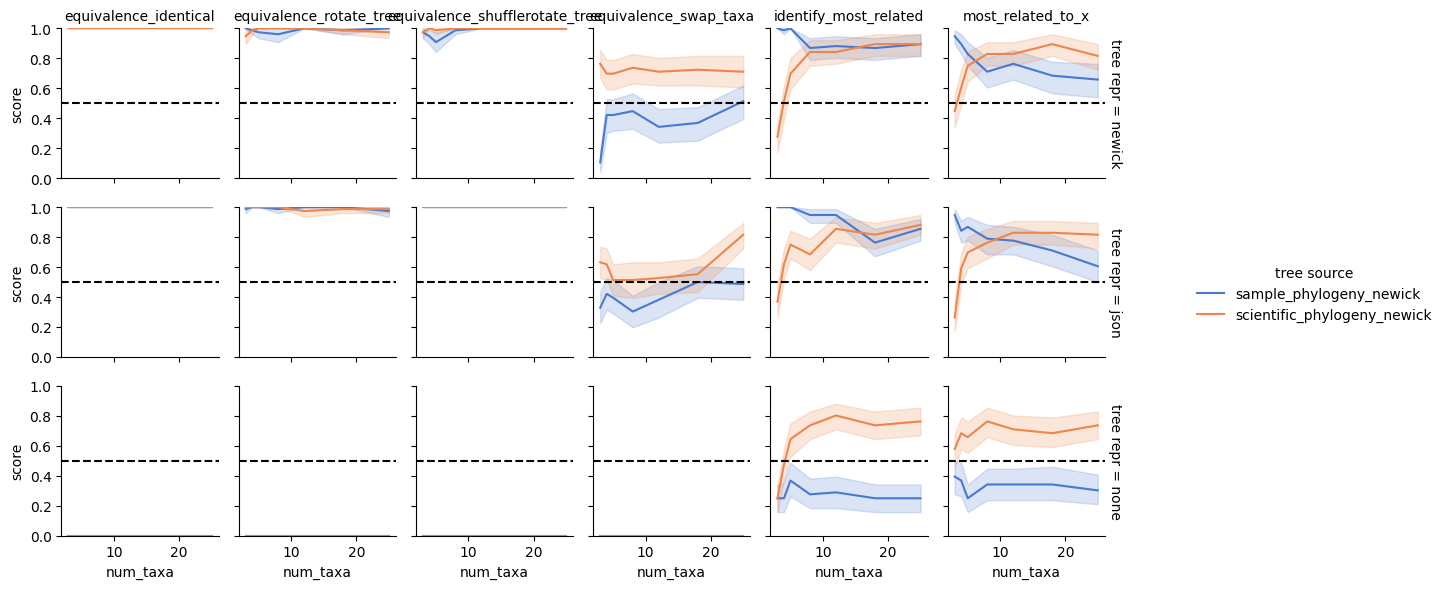

teeplots/2024-11-07-scientific/col=q+hue=tree-source+kind=line+model=gpt-4o-mini+palette=muted+row=tree-repr+viz=relplot+x=num-taxa+y=score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=tree-source+kind=line+model=gpt-4o-mini+palette=muted+row=tree-repr+viz=relplot+x=num-taxa+y=score+ext=.png


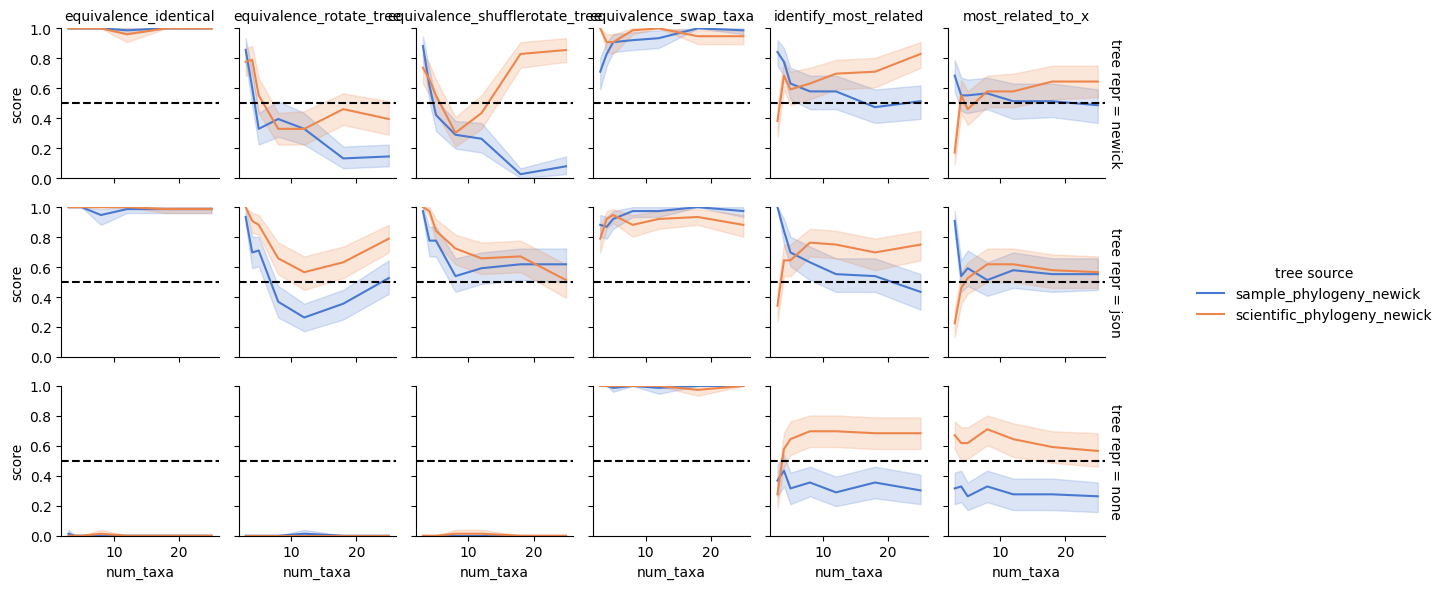

In [11]:
for model, group in df.groupby("model"):
    saveit, teed = tp.tee(
        sns.relplot,
        data=group,
        x="num_taxa",
        y="score",
        hue="tree source",
        col="Q",
        row="tree repr",
        height=2,
        facet_kws=dict(
            margin_titles=True,
        ),
        kind="line",
        palette="muted",
        teeplot_callback=True,
        teeplot_outattrs=dict(
            model=model,
        ),
        teeplot_subdir=teeplot_subdir,
    )

    teed.set(ylim=(0, 1.0))
    teed.refline(y=0.5, linestyle="--", color="black")
    teed.set_titles(col_template="{col_name}")

    saveit()


teeplots/2024-11-07-scientific/col=q+hue=tree-source+kind=line+model=gpt-4o+palette=muted+row=tree-repr+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=tree-source+kind=line+model=gpt-4o+palette=muted+row=tree-repr+viz=relplot+x=num-taxa+y=adj-score+ext=.png


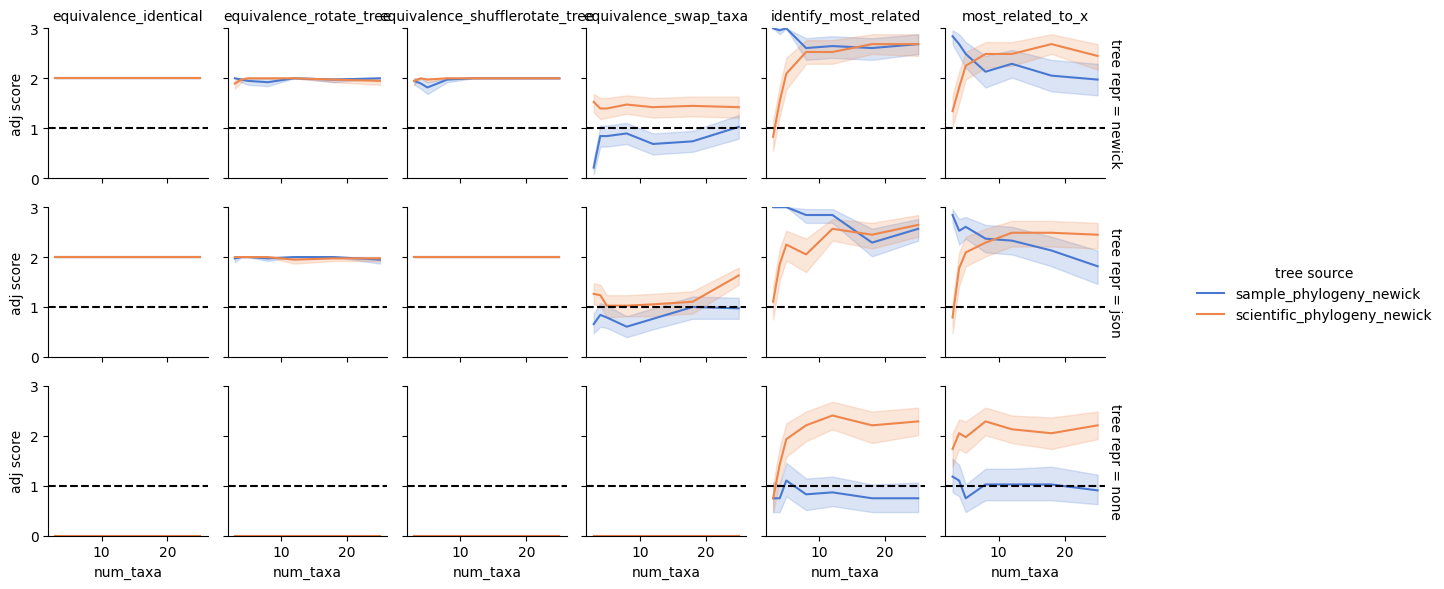

teeplots/2024-11-07-scientific/col=q+hue=tree-source+kind=line+model=gpt-4o-mini+palette=muted+row=tree-repr+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=tree-source+kind=line+model=gpt-4o-mini+palette=muted+row=tree-repr+viz=relplot+x=num-taxa+y=adj-score+ext=.png


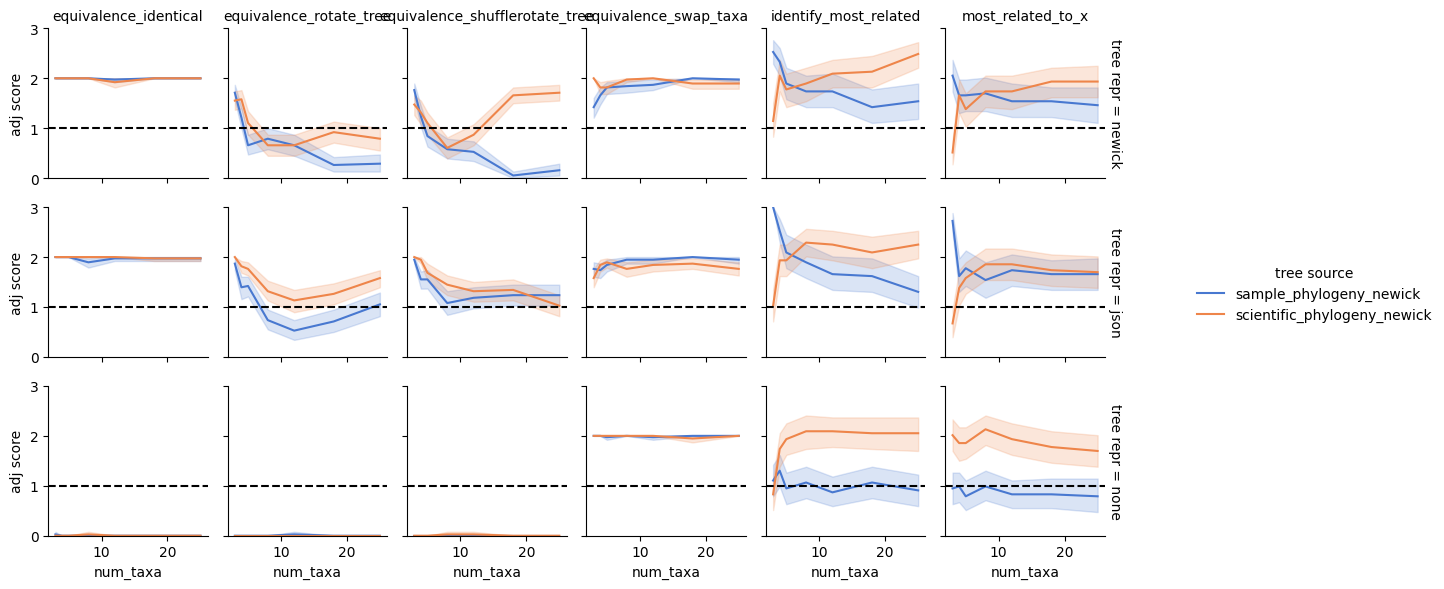

In [12]:
for model, group in df.groupby("model"):
    saveit, teed = tp.tee(
        sns.relplot,
        data=group,
        x="num_taxa",
        y="adj score",
        hue="tree source",
        col="Q",
        row="tree repr",
        height=2,
        facet_kws=dict(
            margin_titles=True,
        ),
        kind="line",
        palette="muted",
        teeplot_callback=True,
        teeplot_outattrs=dict(
            model=model,
        ),
        teeplot_subdir=teeplot_subdir,
    )

    teed.set(ylim=(0, 3.0))
    teed.refline(y=1.0, linestyle="--", color="black")
    teed.set_titles(col_template="{col_name}")

    saveit()
